# 1. Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn. model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,classification_report,plot_confusion_matrix,plot_roc_curve


In [2]:
df = pd.read_csv(r"C:\Users\subasish\Desktop\ml projects\Loan prediction\Training Data.csv")

# 2. Understanding the data

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
df.shape

(252000, 13)

In [5]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


# 3. Data Cleaning and Preprocessing

CITY and STATE columns has some values with special characters and numbers. so that we need to clean it first.

In [8]:
def unclean_names(col):
    unclean_names = []
    for name in df[str(col)].unique():
        if name.endswith(']'):
            unclean_names.append(name)
    return unclean_names

unclean_city_names = unclean_names('CITY')
unclean_city_names

['Tiruchirappalli[10]',
 'Kota[6]',
 'Hajipur[31]',
 'Erode[17]',
 'Anantapuram[24]',
 'Aurangabad[39]',
 'Purnia[26]',
 'Eluru[25]',
 'Siwan[32]',
 'Motihari[34]',
 'Warangal[11][12]',
 'Jehanabad[38]',
 'Kishanganj[35]',
 'Tirupati[21][22]',
 'Kurnool[18]',
 'Kadapa[23]',
 'Jammu[16]',
 'Rajahmundry[19][20]',
 'Saharsa[29]',
 'Jamalpur[36]',
 'Dehri[30]',
 'Nellore[14][15]',
 'Visakhapatnam[4]',
 'Buxar[37]',
 'Ramagundam[27]',
 'Sasaram[30]',
 'Guntur[13]',
 'Chittoor[28]',
 'Bettiah[33]',
 'Mysore[7][8][9]']

In [9]:
unclean_state_names = unclean_names('STATE')
unclean_state_names

['Uttar_Pradesh[5]']

In [10]:
def clean_df(df,col,unclean_list):
    for index,name in enumerate(df[col]):
        if name in unclean_list:
            if name.endswith(']'):
                name_ = name.strip('[]0123456789')
                df[col].iloc[index] = name_
                
clean_df(df,'STATE',unclean_state_names)
clean_df(df,'CITY',unclean_city_names)

In [11]:
df["CITY"]

0                    Rewa
1                Parbhani
2               Alappuzha
3             Bhubaneswar
4         Tiruchirappalli
               ...       
251995            Kolkata
251996               Rewa
251997    Kalyan-Dombivli
251998        Pondicherry
251999              Avadi
Name: CITY, Length: 252000, dtype: object

# Checking for any Missing Values

<AxesSubplot:>

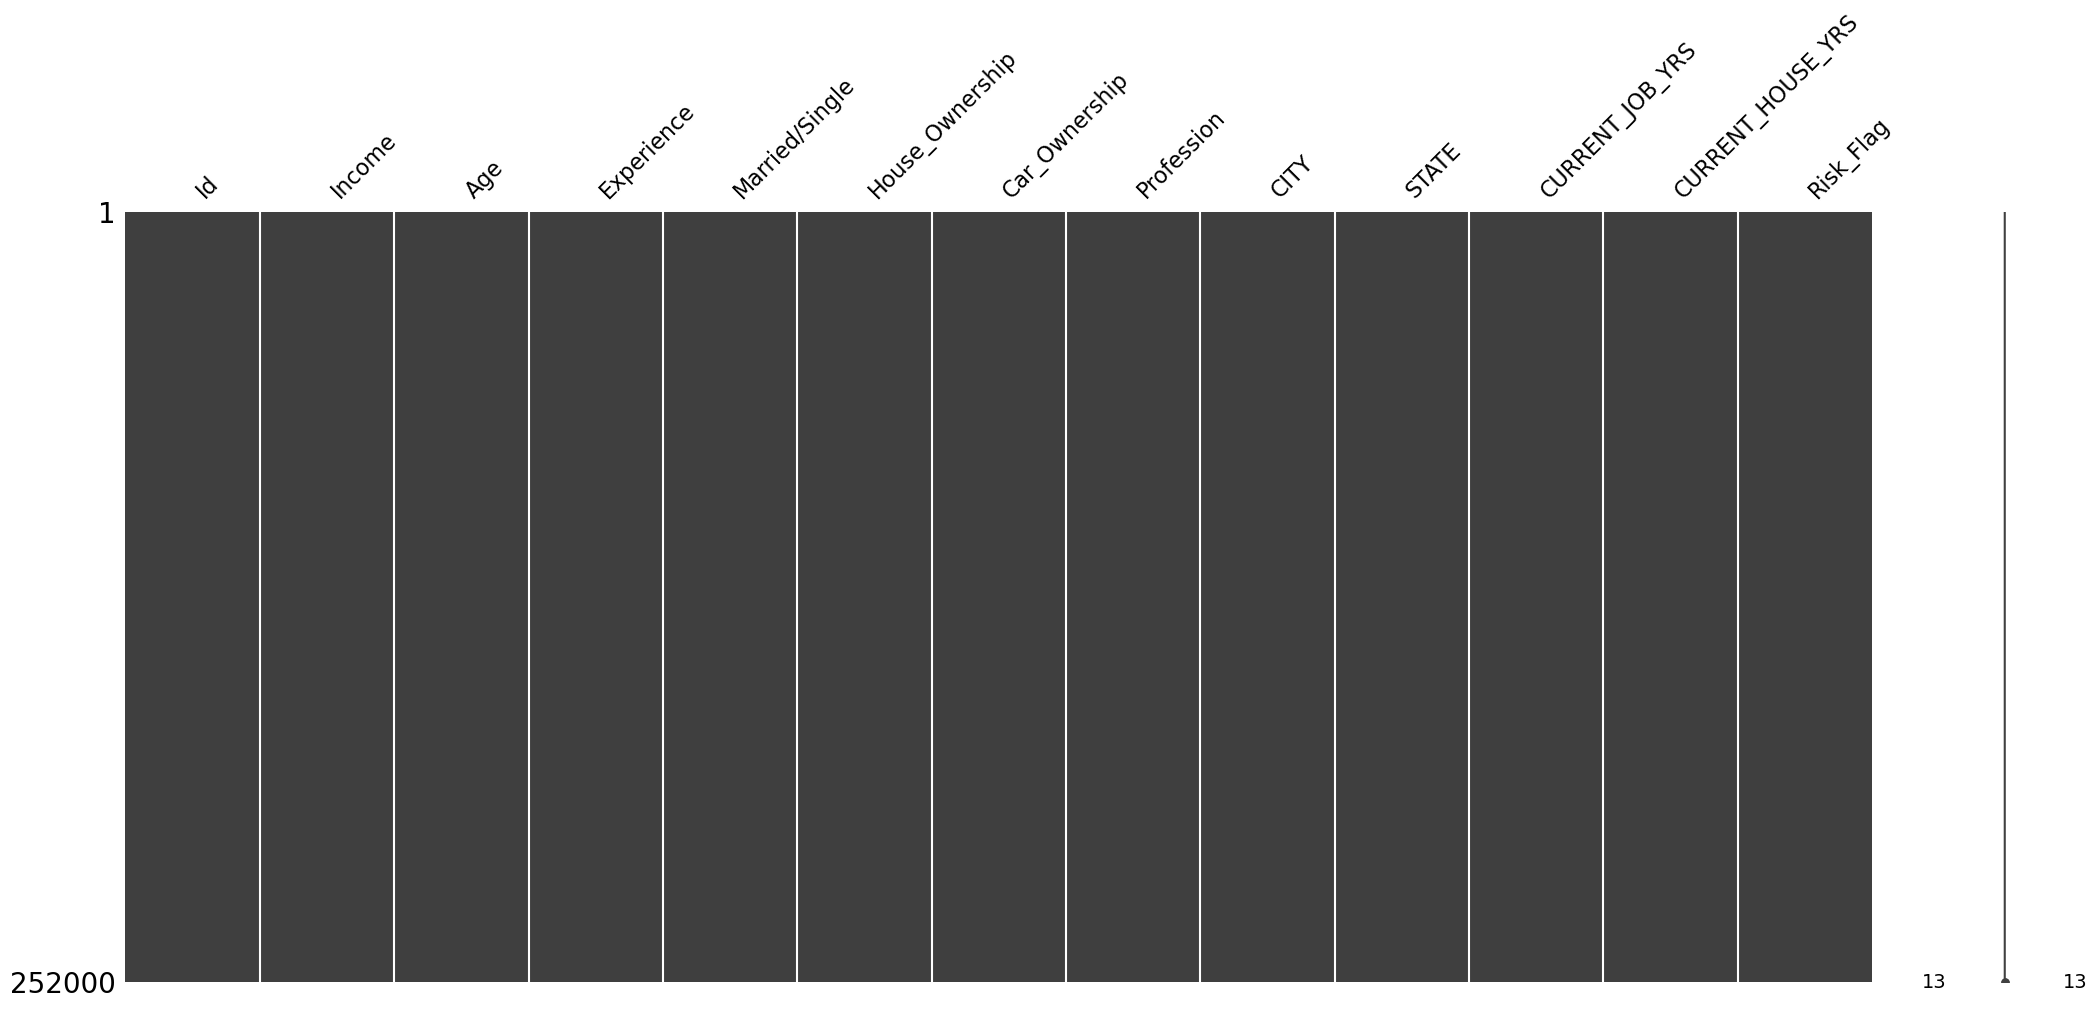

In [12]:
#Visualize missing values as a matrix
msno.matrix(df)

In [13]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

# Checking for any Outliers

<AxesSubplot:xlabel='Income'>

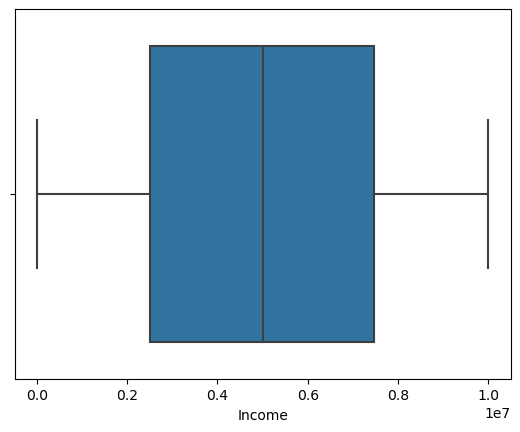

In [14]:
sns.boxplot(df['Income'])

<AxesSubplot:xlabel='CURRENT_JOB_YRS'>

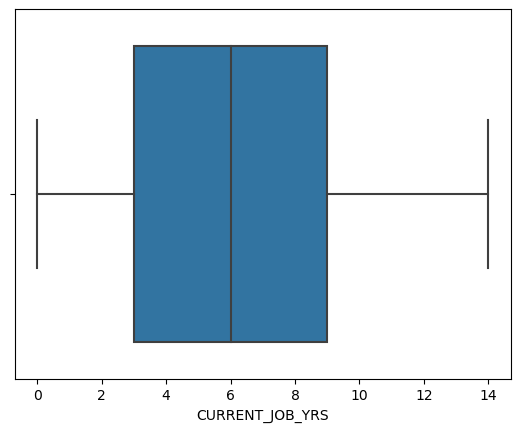

In [15]:
sns.boxplot(df['CURRENT_JOB_YRS'])

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS'>

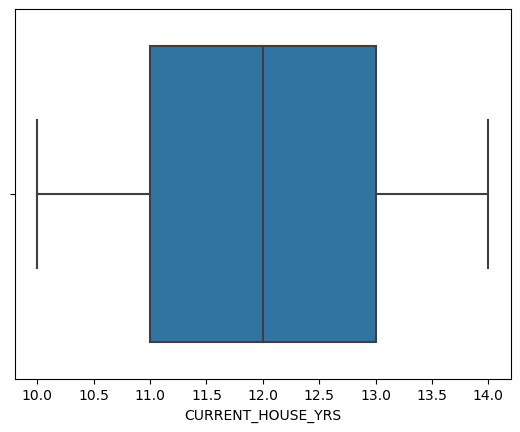

In [16]:
sns.boxplot(df['CURRENT_HOUSE_YRS'])

<AxesSubplot:xlabel='Experience'>

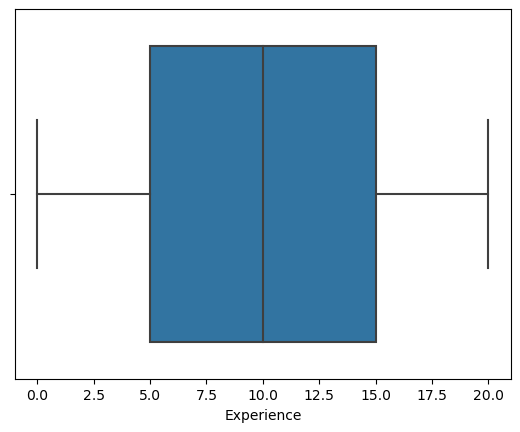

In [17]:
sns.boxplot(df['Experience'])

There is no Outliers In this Dataset

# 4. Exploratory Data Analysis (EDA)

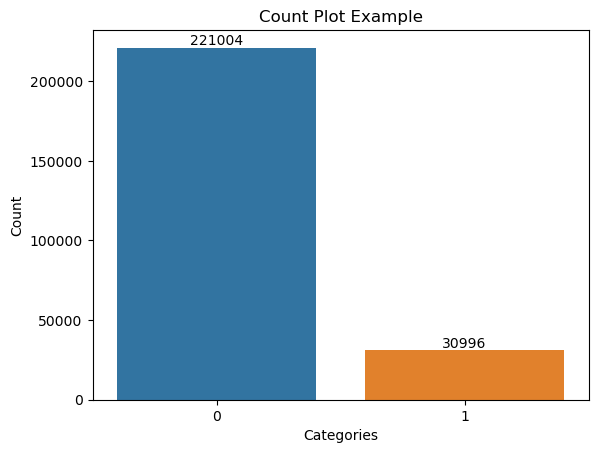

In [18]:
ax = sns.countplot(df['Risk_Flag'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count Plot Example')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

Here Non-Defaulter(0) is 221004 and Defaulter(1) is 30996

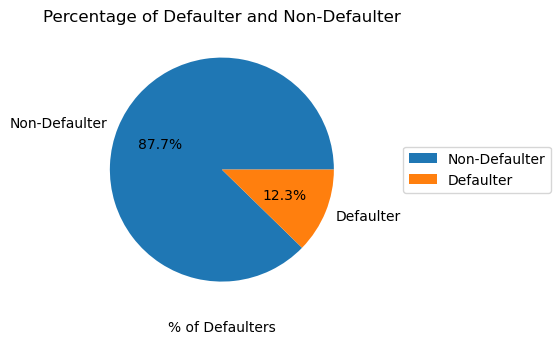

In [19]:
fig = plt.figure()
ax = fig.add_subplot(2,1,1,anchor='C')
plt.title('Percentage of Defaulter and Non-Defaulter')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax,figsize=(10,8))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))

Here, This chart shows Percentage of Defaulter and Non-Defaulter. Non-Defaulter is 87.7% and Defaulter is 12.3%

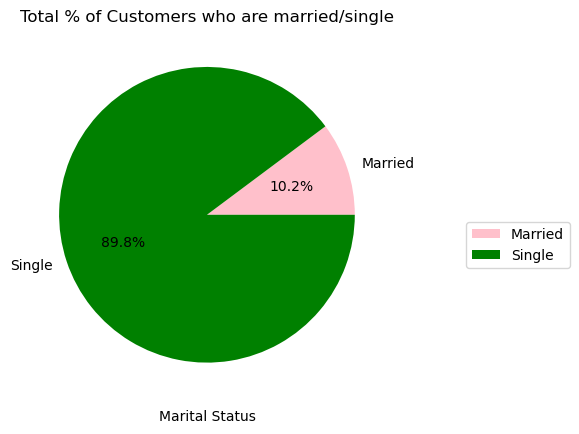

In [20]:
df.groupby('Married/Single').count()['Id'].plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%',colors=['Pink','Green'])
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Total % of Customers who are married/single')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

Here, This chart shows Total % of Customers who are married/single. single is 89.8% and Married is 10.2%

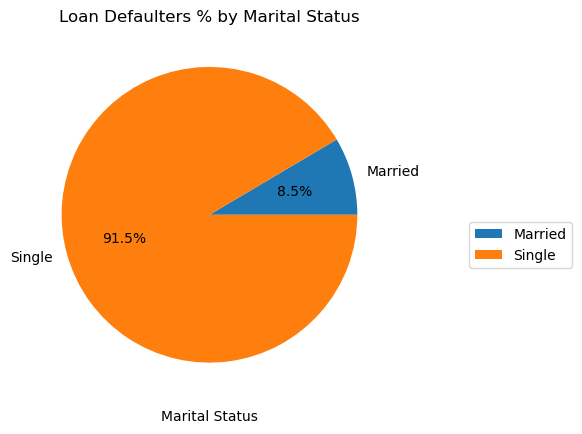

In [21]:
marital_status = df.loc[df['Risk_Flag'] == 1].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Defaulters % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

Here, This chart shows Percentage of Marital Status for Loan Defaulter. single loan Defaulter is 91.5% and Married loan Defaulter is 8.5%

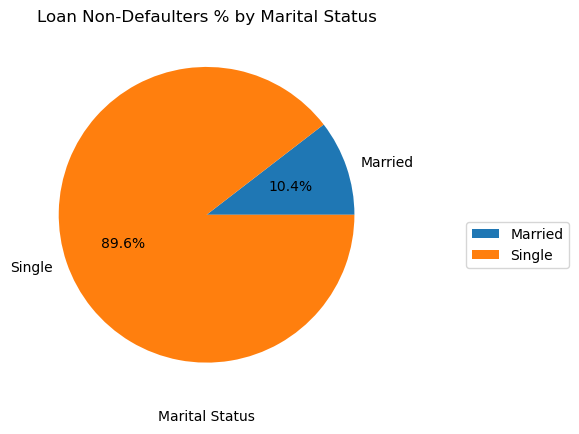

In [22]:
marital_status = df.loc[df['Risk_Flag'] == 0].groupby('Married/Single').count()['Id']
marital_status.plot(kind='pie',startangle=0,labels=['Married','Single'],autopct='%1.1f%%')
plt.xlabel('Marital Status')
plt.ylabel('')
plt.title('Loan Non-Defaulters % by Marital Status')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

Here, This chart shows Percentage of Marital Status for Non-Defaulter People. single Non-Defaulter People is 89.6% and Married Non-Defaulter People is 10.4%

In [23]:
df["Risk_Flag"][df["Risk_Flag"]==1].groupby(by=df["Married/Single"]).count()

Married/Single
married     2636
single     28360
Name: Risk_Flag, dtype: int64

In [24]:
df["Risk_Flag"][df["Risk_Flag"]==0].groupby(by=df["Married/Single"]).count()

Married/Single
married     23092
single     197912
Name: Risk_Flag, dtype: int64

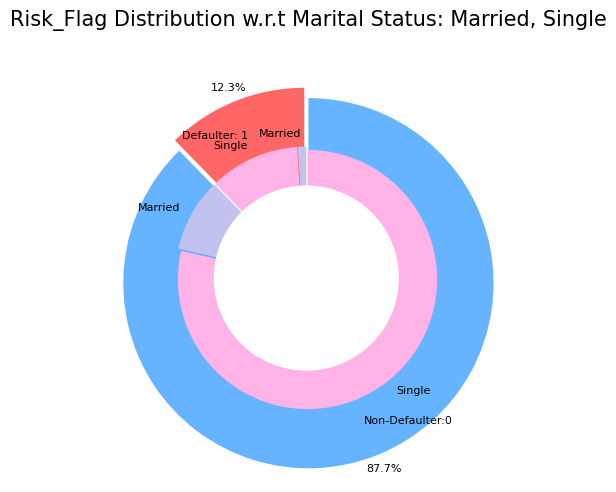

In [25]:
plt.figure(figsize=(5, 5))
labels =["Defaulter: 1","Non-Defaulter:0"]
values = [30996,221004]
marital_status = ["Married","Single","Married","Single"]
sizes_marital_status = [2636,28360 , 23092,197912]
colors = ['#ff6666', '#66b3ff']
colors_marital_status = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_marital_status = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":8}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_marital_status,labels=marital_status,colors=colors_marital_status,startangle=90, explode=explode_marital_status,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Risk_Flag Distribution w.r.t Marital Status: Married, Single', fontsize=15, y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [26]:
house_ownership_count = df.groupby('House_Ownership').count()['Id']
house_ownership_count

House_Ownership
norent_noown      7184
owned            12918
rented          231898
Name: Id, dtype: int64

(0.0, 250000.0)

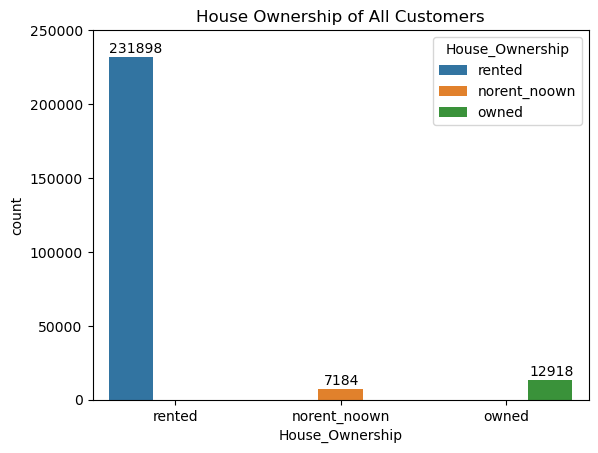

In [27]:
sns.countplot(data=df,x='House_Ownership',hue='House_Ownership',)
plt.text(-0.4,235000,str(231898))
plt.text(0.9,10000,str(7184))
plt.text(2.14,16000,str(12918))
plt.title('House Ownership of All Customers')
plt.ylim(0,250000)

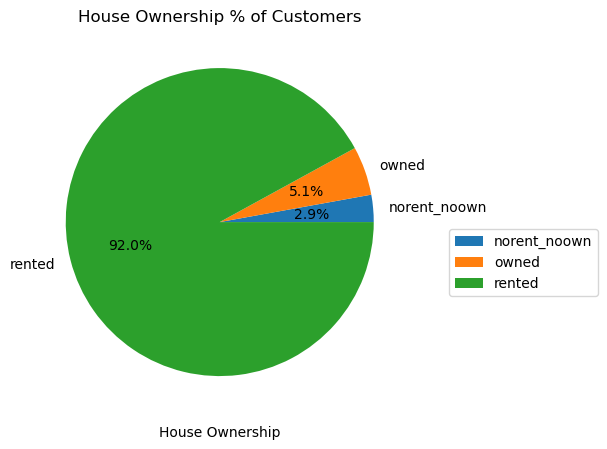

In [28]:
df.groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.xlabel('House Ownership')
plt.title('House Ownership % of Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

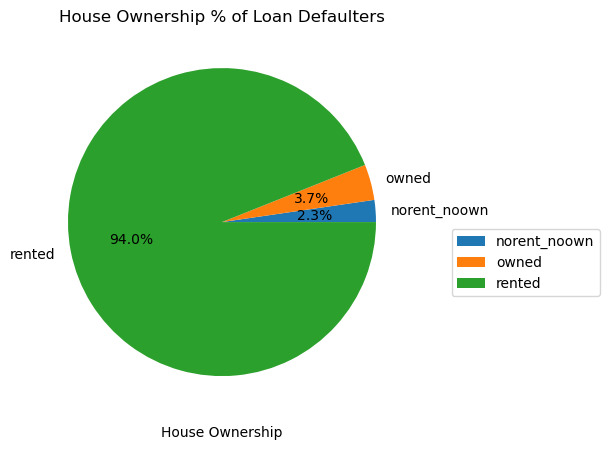

In [29]:
df.loc[df['Risk_Flag'] == 1].groupby('House_Ownership').count()['Id'].plot(kind='pie',startangle=0,autopct='%1.1f%%',figsize=(5,5))
plt.ylabel('')
plt.title('House Ownership % of Loan Defaulters')
plt.xlabel('House Ownership')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))

In [30]:
car_ownership = df.groupby('Car_Ownership').count()['Id']
car_ownership

Car_Ownership
no     176000
yes     76000
Name: Id, dtype: int64

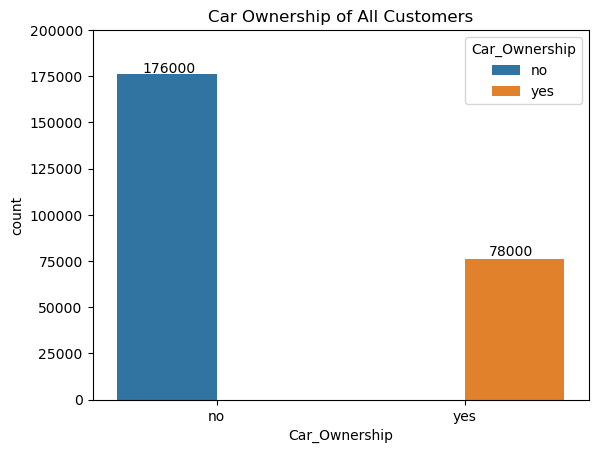

In [31]:
sns.countplot(data=df,x='Car_Ownership',hue='Car_Ownership')
plt.text(-0.3,177000,str(176000))
plt.text(1.1,78000,str(78000))
plt.ylim(0,200000)
plt.title('Car Ownership of All Customers')
plt.show()

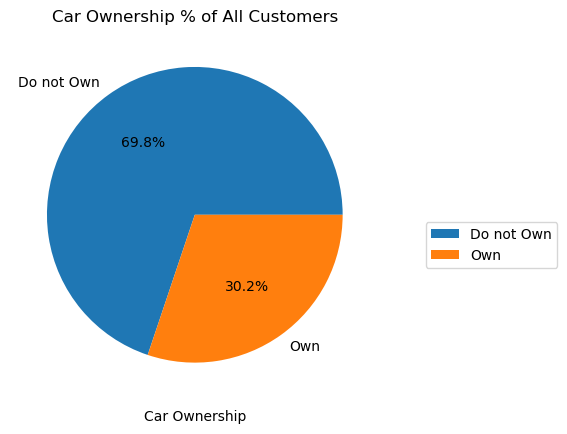

In [32]:
car_ownership.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of All Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

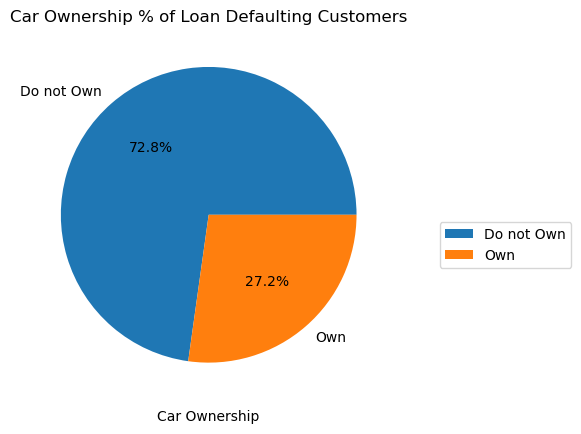

In [33]:
car_ownership_default = df.loc[df['Risk_Flag'] == 1].groupby('Car_Ownership').count()['Id']
car_ownership_default.plot(kind='pie',startangle=0,labels=['Do not Own','Own'],autopct='%1.1f%%')
plt.ylabel('')
plt.xlabel('Car Ownership')
plt.title('Car Ownership % of Loan Defaulting Customers')
plt.legend(loc='best',bbox_to_anchor=(1,0,0.5,0.5))
plt.show()

In [34]:
df1 = df.loc[df['Risk_Flag'] == 1].groupby(['STATE','Risk_Flag']).count()
df1.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df1.reset_index(inplace=True)
df1[['STATE','Total_Defaulters']]

,STATE,Total_Defaulters
0,Andhra_Pradesh,2935
1,Assam,930
2,Bihar,2583
3,Chandigarh,61
4,Chhattisgarh,511
5,Delhi,574
6,Gujarat,1343
7,Haryana,980
8,Himachal_Pradesh,111
9,Jammu_and_Kashmir,283


In [35]:
df2 = df.groupby('STATE').count()
df2.rename(columns={'Id':'Total_Loans'},inplace=True)
df2.reset_index(inplace=True)

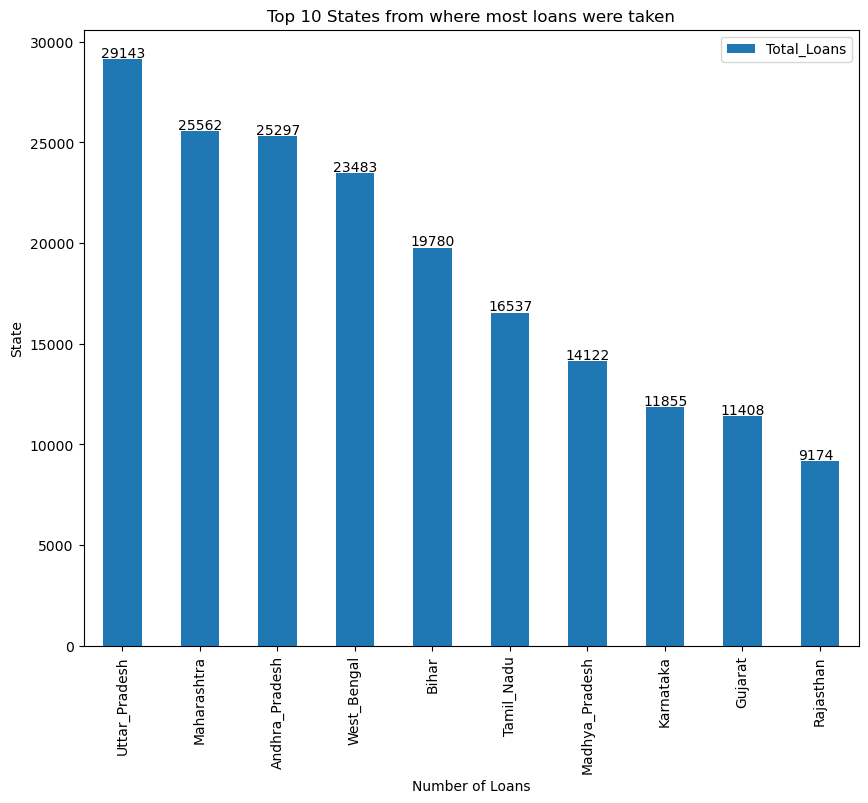

In [36]:
df_total_loans = df2[['STATE','Total_Loans']].sort_values(by='Total_Loans',ascending=False)[:10]
df_total_loans.plot(kind='bar',x='STATE',figsize=(10,8))
plt.title('Top 10 States from where most loans were taken')
plt.xlabel('Number of Loans')
plt.ylabel('State')
for index,value in enumerate(df_total_loans['Total_Loans'][:10]):
    plt.text(index-0.28,value+100,str(value))
plt.show()

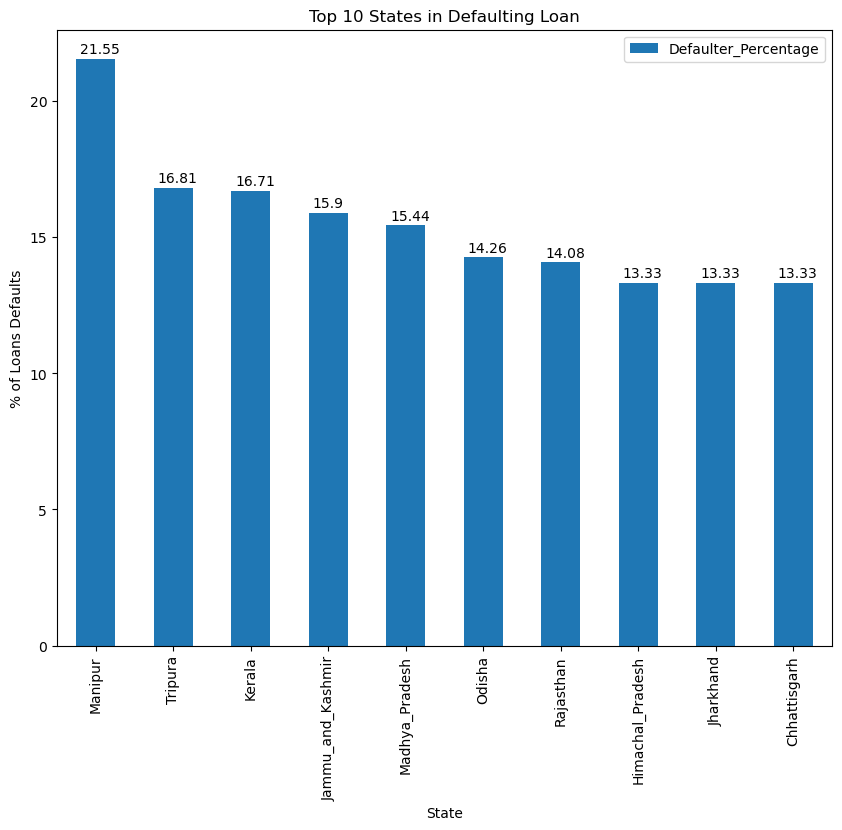

In [37]:
defaulter_percent_per_state = (df1['Total_Defaulters']/df2['Total_Loans']).round(4)*100
state_defaulters_percentage=pd.DataFrame(
    data=zip(df1['STATE'],defaulter_percent_per_state),
    columns=['STATE','Defaulter_Percentage'])
df_dps = state_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10]
df_dps.plot(kind='bar',figsize=(10,8),x='STATE')
plt.title('Top 10 States in Defaulting Loan')
plt.ylabel('% of Loans Defaults')
plt.xlabel('State')
for index,value in enumerate(df_dps['Defaulter_Percentage'][:10]):
    plt.text(index-0.2,value+0.2,str(round(value,2)))
plt.legend(loc='best')
plt.show()

In [38]:
df3 = df.groupby('CITY').count()
df3.rename(columns={'Id':'Total_Loans'},inplace=True)
df3.reset_index(inplace=True)
df3[['CITY','Total_Loans']]

,CITY,Total_Loans
0,Adoni,953
1,Agartala,809
2,Agra,1012
3,Ahmedabad,649
4,Ahmednagar,645
...,...,...
311,Vijayanagaram,1259
312,Vijayawada,1172
313,Visakhapatnam,971
314,Warangal,459


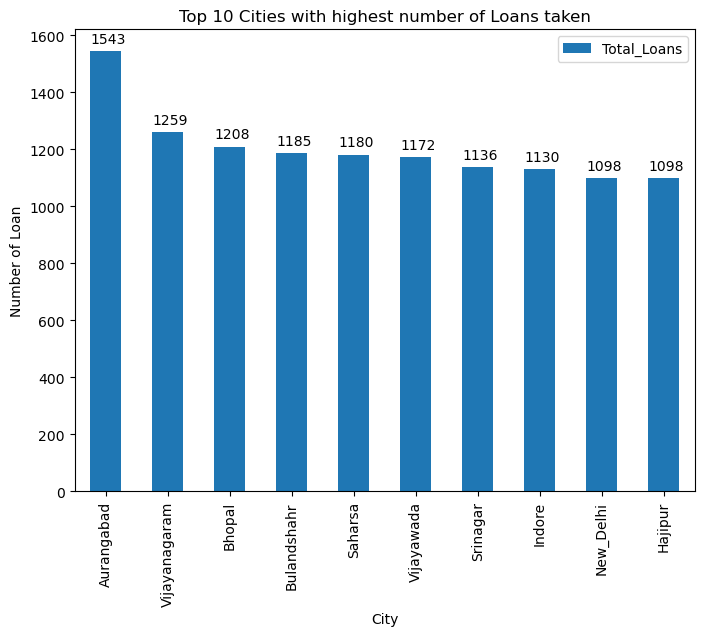

In [39]:
#top10 cities in number of loans

df3_ = df3[['CITY','Total_Loans']].sort_values(by='Total_Loans',ascending=False)[:10]
df3_.plot(kind='bar',x='CITY',figsize=(8,6))
plt.title('Top 10 Cities with highest number of Loans taken')
plt.xlabel('City')
plt.ylabel('Number of Loan')
for index,value in enumerate(df3_['Total_Loans']):
    plt.text(index-0.25,value+30,str(int(value)))
plt.legend(loc='best')
plt.show()

In [40]:
df4 = df.loc[df['Risk_Flag'] == 1].groupby('CITY').count()
df4.rename(columns={'Id':'Total_Defaulters'},inplace=True)
df4.reset_index(inplace=True)
df4[['CITY','Total_Defaulters']]

,CITY,Total_Defaulters
0,Adoni,103
1,Agartala,136
2,Agra,81
3,Ahmedabad,133
4,Ahmednagar,38
...,...,...
311,Vijayanagaram,149
312,Vijayawada,147
313,Visakhapatnam,141
314,Warangal,25


In [41]:
defaulter_percent_per_city = (df4['Total_Defaulters']/df3['Total_Loans']).round(4)*100
city_defaulters_percentage=pd.DataFrame(
    data=zip(df3['CITY'],defaulter_percent_per_city),
    columns=['CITY','Defaulter_Percentage']
)
city_defaulters_percentage

,CITY,Defaulter_Percentage
0,Adoni,10.81
1,Agartala,16.81
2,Agra,8.00
3,Ahmedabad,20.49
4,Ahmednagar,5.89
...,...,...
311,Vijayanagaram,11.83
312,Vijayawada,12.54
313,Visakhapatnam,14.52
314,Warangal,5.45


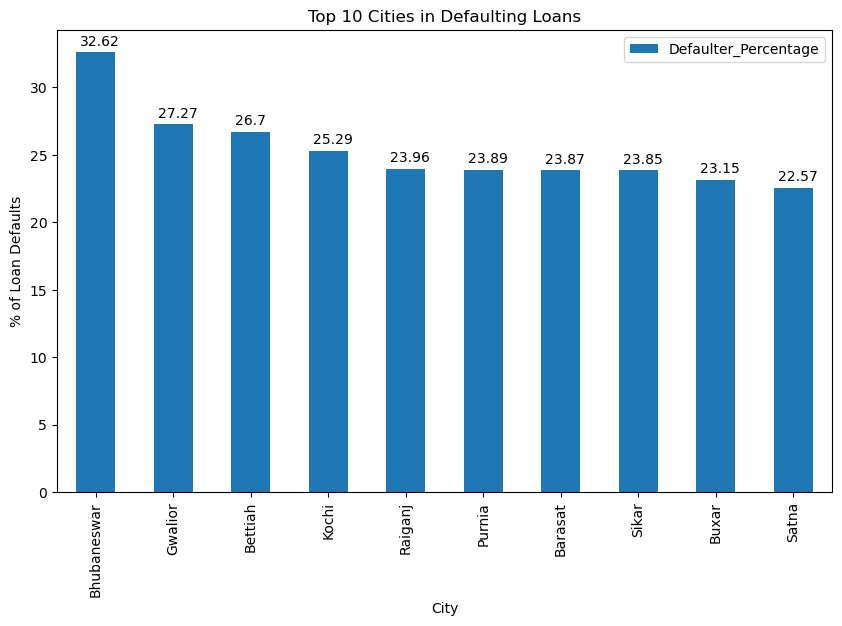

In [42]:
city_defaulters_percentage.sort_values(by='Defaulter_Percentage',ascending=False)[:10].plot(kind='bar',x='CITY',figsize=(10,6))
plt.title('Top 10 Cities in Defaulting Loans')
plt.xlabel('City')
plt.ylabel('% of Loan Defaults')
plt.legend(loc='best')
top_10_vals = city_defaulters_percentage['Defaulter_Percentage'].sort_values(ascending=False)[:10]
for index,value in enumerate(top_10_vals):
    plt.text(index-0.2,value+0.5,str(round(value,2)))
plt.show()

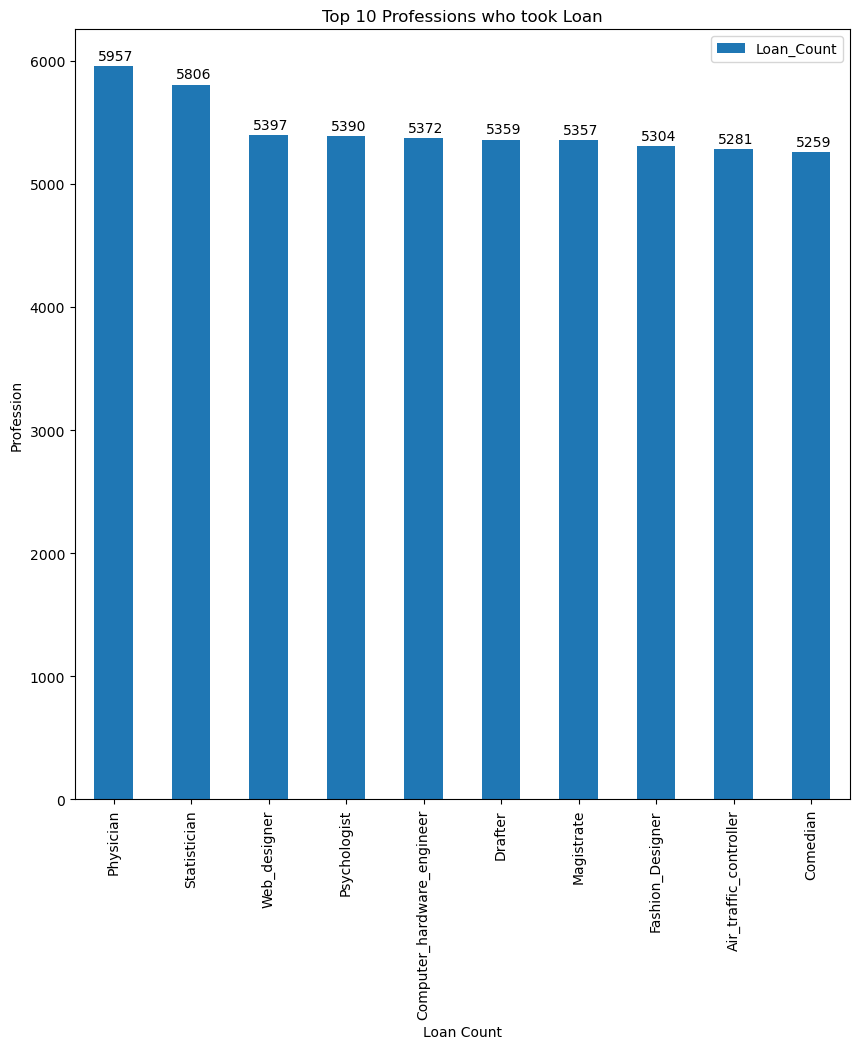

In [43]:
df_profession_loan_count = df.groupby('Profession').count()['Id'].sort_values(ascending=False)
df_plc = df_profession_loan_count.reset_index()
df_plc.rename(columns= {'Id':'Loan_Count'},inplace=True)
df_plc[:10].plot(kind='bar',x='Profession',figsize=(10,10))
plt.legend(loc='best')
plt.title('Top 10 Professions who took Loan')
plt.xlabel('Loan Count')
plt.ylabel('Profession')
for index,value in enumerate(df_plc['Loan_Count'][:10]):
    plt.text(index-0.2,value+50,str(value))
plt.show() 

In [44]:
profession = df.groupby(['Profession']).mean()[['Income','Risk_Flag']]

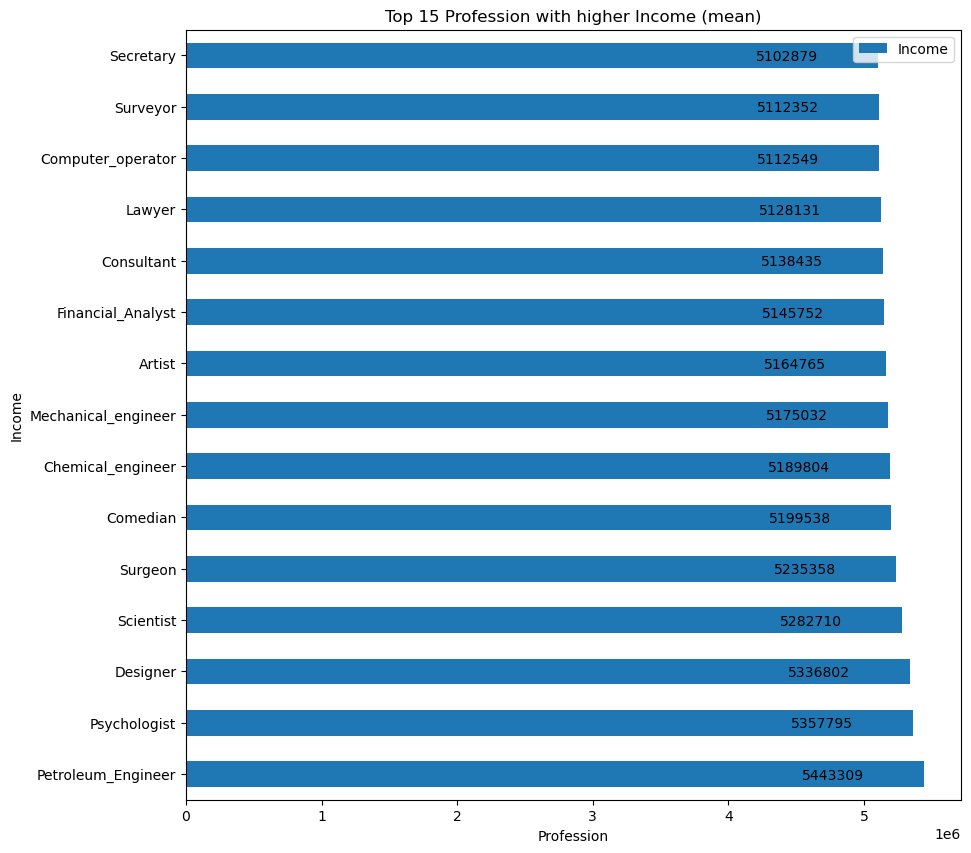

In [45]:
#plotting top10 profession_group with higher income

profession_top10_income = profession['Income'].sort_values(ascending=False)[:15]
profession_top10_income.plot(kind='barh',figsize=(10,10))
plt.title('Top 15 Profession with higher Income (mean)')
plt.xlabel('Profession')
plt.ylabel('Income')

for index,value in enumerate(profession_top10_income):
    plt.text(value-900000,index-0.1,str(int(value)))
plt.legend(loc='best')
plt.show()

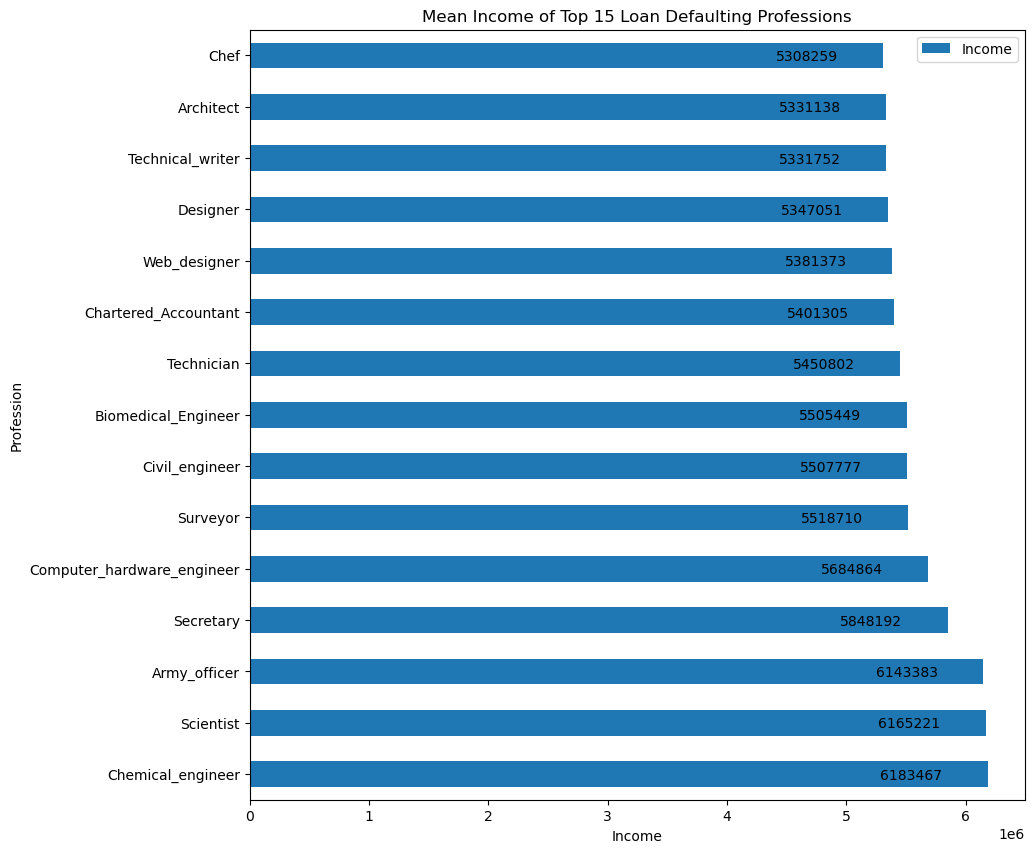

In [46]:
df_ = df.loc[df['Risk_Flag'] == 1].groupby(['Profession']).mean()[['Income']].sort_values(by='Income',ascending=False)
df_.sort_values(by='Income',ascending=False)[:15].plot(kind='barh',figsize=(10,10))
plt.title('Mean Income of Top 15 Loan Defaulting Professions') 
plt.xlabel('Income')
plt.ylabel('Profession')
for index,value in enumerate(df_['Income'][:15]):
    plt.text(value-900000,index-0.1,str(int(value)))

plt.legend(loc='best')
plt.show()

# Resampling the Data

Our Dataset is a imbalanced dataset.Beacause Risk_Flag is a target variable and it contains 0 is 221004 times and 1 is 30996 times , which is not balanced. This class imbalance can pose challenges for machine learning algorithms, as they tend to be biased toward the majority class, leading to poor performance on the minority class.

In [47]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler(random_state=42,sampling_strategy=0.45)
X = df.iloc[:,:-1]
y = df['Risk_Flag']

In [48]:
X_sampled,y_sampled = sampler.fit_resample(X,y)

In [49]:
from collections import Counter
print(Counter(y),Counter(y_sampled))

Counter({0: 221004, 1: 30996}) Counter({0: 221004, 1: 99451})


Here we can noticed that, previously 1 has 30996 times. But after resampling, 1 has 99451 times

In [50]:
df_ = pd.concat([X_sampled,y_sampled],axis=1)

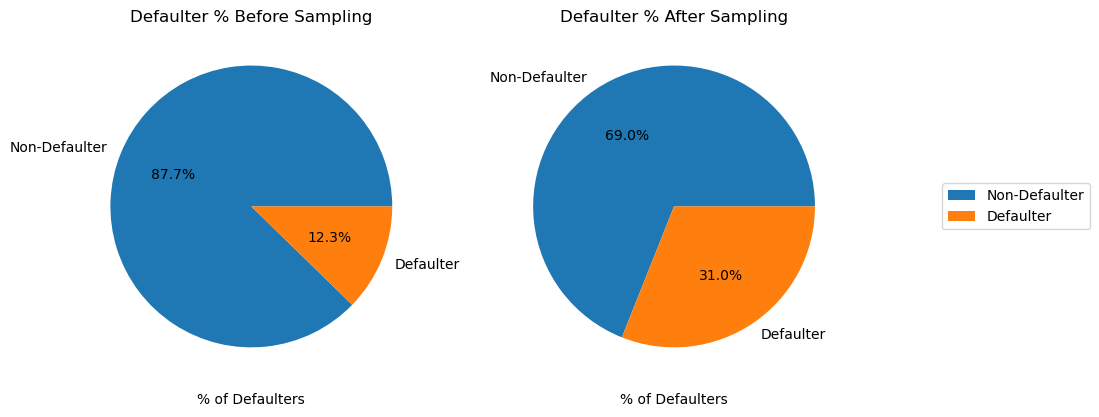

In [51]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
plt.title('Defaulter % Before Sampling')
df.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax1,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')

ax2 = fig.add_subplot(122)
plt.title('Defaulter % After Sampling')
df_.groupby('Risk_Flag').count()['Id'].plot(kind='pie',labels=['Non-Defaulter','Defaulter'],autopct='%1.1f%%',ax=ax2,figsize=(10,10))
plt.xlabel('% of Defaulters')
plt.ylabel('')
plt.legend(loc='right',bbox_to_anchor=(0.7,0,1,1))

Here is the visual representation of Defaulter % Before Sampling and Defaulter % After Sampling

# Encoding the Categorical data

In [52]:
cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    df_[col] = labelencoder.fit_transform(df_[col])

Now we can checking if there is any missing values exist in our dataset

In [53]:
df_.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [54]:
#Dropping Id as it's not needed in prediction
df_.drop(['Id'],axis=1,inplace=True)

In [55]:
df_

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,250,13,3,13,0
1,7574516,40,10,1,2,0,43,226,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,53,17,2,12,1
4,5768871,47,11,1,2,0,11,295,22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
320450,9205302,77,13,1,2,1,34,80,10,11,13,1
320451,140516,29,19,1,2,0,39,310,22,14,10,1
320452,9763429,73,5,1,2,0,15,297,0,5,11,1
320453,6877905,40,9,1,2,1,30,63,25,7,11,1


In [56]:
X = df_.iloc[:,:-1]
y = df_['Risk_Flag']

# Splitting the dataset into training and test set

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Machine Learning Model Evaluations and Predictions

In [58]:
#Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy = dt.score(X_test, y_test)
print('Decision Tree Accuracy is:',(accuracy*100).round(2),'%')
print(f'F1 Score: {f1_score(y_test,y_pred)}\n')

Decision Tree Accuracy is: 91.22 %
F1 Score: 0.8725219308178949



In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     66611
           1       0.79      0.98      0.87     29526

    accuracy                           0.91     96137
   macro avg       0.89      0.93      0.90     96137
weighted avg       0.93      0.91      0.91     96137



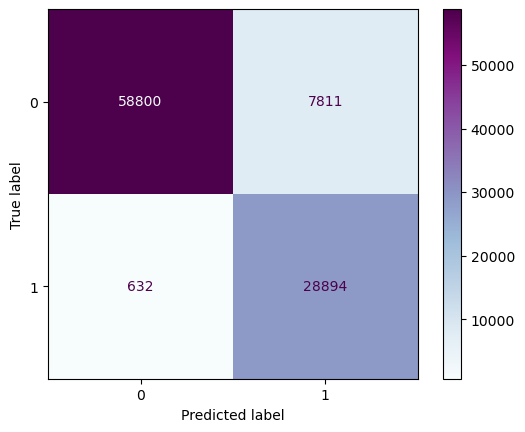

In [60]:
plot_confusion_matrix(estimator=dt,X=X_test,y_true=y_test,cmap="BuPu")

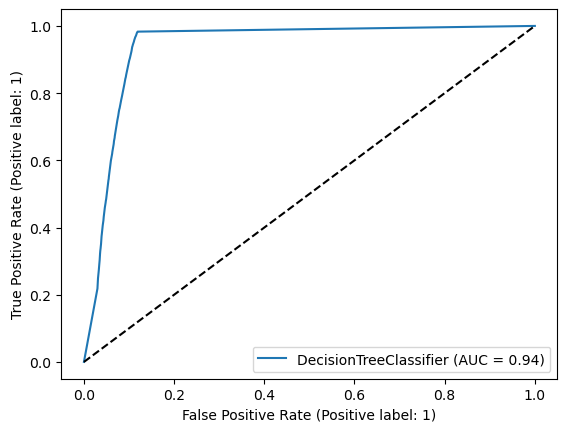

In [61]:
plot_roc_curve(estimator=dt,X=X_test,y=y_test)
plt.plot([0,1],[0,1],"--",c='black')

# FUTURE PREDICTION

In [62]:
dataset1 = pd.read_csv(r"C:\Users\subasish\Desktop\ml projects\Loan prediction\Test Data.csv")
dataset1

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,27996,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,27997,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,27998,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,27999,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [63]:
dataset1.drop(['ID'],axis=1,inplace=True)

In [64]:
d2 = dataset1.copy()

cols_to_encode= ['Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE']
labelencoder = LabelEncoder()

for col in cols_to_encode:
    dataset1[col] = labelencoder.fit_transform(dataset1[col])
    
dataset1 = dataset1.iloc[: ,:].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
M = sc.fit_transform(dataset1)

y_pred1 = pd.DataFrame()        #It is a empty Dataframe


d2 ['y_pred1'] = dt.predict(M)

d2.to_csv('final1.csv')
d2


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,y_pred1
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,1
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,1
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,1
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,1
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10,1
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14,1
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13,1
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14,1
